# EDSA - Climate Change Belief Analysis 2021
Predict an individual’s belief in climate change based on historical tweet data

In [1]:
from comet_ml import Experiment

In [2]:
# Create an experiment with your api key
experiment = Experiment(
    api_key="KQ1UTh7hBvPLWlz3034oIgusG",
    project_name="zm3-edsa-climate-change-belief-analysis-2021", workspace="thobekanimasondo84-gmail-com")

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/thobekanimasondo84-gmail-com/zm3-edsa-climate-change-belief-analysis-2021/80f2d3dfa19e48ff82c186267cd36dcc



In [3]:
from PIL import Image
import requests
from io import BytesIO
def image_magic(image_number):
    if image_number == 1:
        image_address = 'https://en.reset.org/files/imagecache/sc_832x468/2018/02/27/planet_earth.jpg'
    if image_number == 2:
        image_address = 'https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F2205222%2F8e4d65f2029797e0462b52022451829c%2Fdata.PNG?generation=1590752860255531&alt=media'
    if image_number == 3:
        image_address = 'https://miro.medium.com/max/1360/1*TxamxmdIncBmo4TWIy1FQg.png'
    if image_number == 4:
        image_address = 'https://www.ft.com/__origami/service/image/v2/images/raw/https%3A%2F%2Fd1e00ek4ebabms.cloudfront.net%2Fproduction%2Ffedbcea4-dc08-4836-ae87-4fcf6a3cde59.jpg?fit=scale-down&source=next&width=700'
    if image_number == 5:
        image_address = 'https://miro.medium.com/max/1400/0*faGOBR2ZkW6y4xYx.png'
    if image_number == 6:
        image_address = 'https://miro.medium.com/max/1200/0*uoJhp9fB0xlgfLN7.png'
    open_door = requests.get(image_address)
    climate_picture = Image.open(BytesIO(open_door.content))
    return(climate_picture)

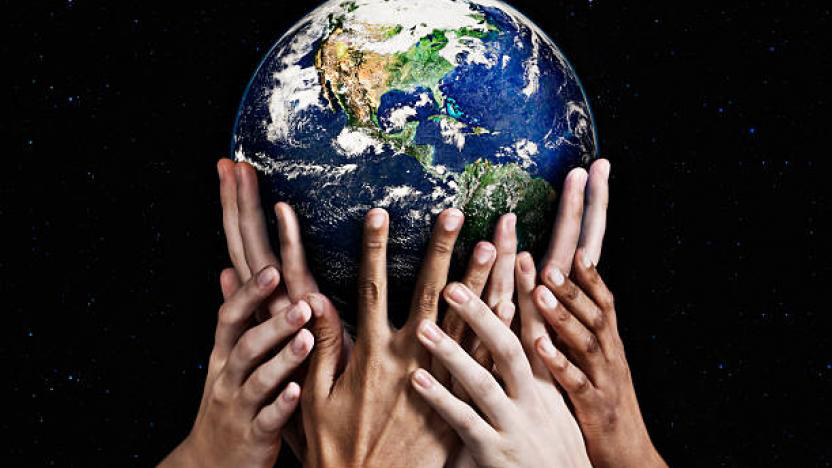

In [101]:
image_magic(1)

Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. Determining how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how product/service may be received.

This Machine Learning model is able to classify whether or not a person believes in climate change, based on their novel tweet data.

Providing an accurate and robust solution to this gives companies access to a broad base of consumer sentiment, spanning multiple demographic and geographic categories - thus increasing their insights and informing future marketing strategies.

In [102]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

### Python Libraries
***This notebook was designed with the following libraries. Should you not have them already installed, simply run to pip install and obtain the desired library.***

In [103]:
#Import python libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re

color = sns.color_palette()
from plotnine import *

%matplotlib inline
#Packages used to display the Exploratory Data Analysis(EDA)
from pandas_profiling import ProfileReport
from IPython.display import IFrame

# Plotting interactive graphs
import plotly.express as px
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

from sklearn.model_selection import train_test_split
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import string
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize, TreebankWordTokenizer 
from nltk import SnowballStemmer, PorterStemmer, LancasterStemmer
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
stemmer = SnowballStemmer('english')
from sklearn.utils import resample
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.datasets import make_gaussian_quantiles
from sklearn.svm import SVC
from scipy import stats
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score,confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

### Data Description

***The collection of this data was funded by a Canada Foundation for Innovation JELF Grant to Chris Bauch, University of Waterloo. The dataset aggregates tweets pertaining to climate change collected between Apr 27, 2015 and Feb 21, 2018. In total, 43943 tweets were collected. Each tweet is labelled as one of the following classes:***

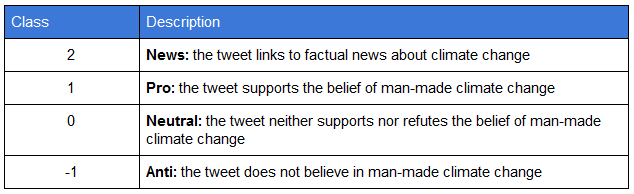

In [104]:
image_magic(2)

In [105]:
train_df = pd.read_csv('train.csv')

The 'train_df' was used to train the model to predict the F score, also called the F1 score or F measure, which is the measure of a test's accuracy. Once we have trained our model and are satisfied with the results we shall proceed to the test data which shall assist us in our predictions

In [106]:
train_df.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


Variable definitions:

sentiment: Sentiment of tweet

message  : Tweet body

tweetid  : Twitter unique id

In [107]:
test_df = pd.read_csv('test_with_no_labels.csv')

In [108]:
test_df.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


The 'test_df' doesn't contain a sentiments column

In [109]:
sub_df = pd.read_csv('Submission.csv')

In [110]:
sub_df.head()

,tweetid,sentiment
0,169760,1
1,35326,1
2,224985,1
3,476263,1
4,872928,0


## Explanatory Data Analysis

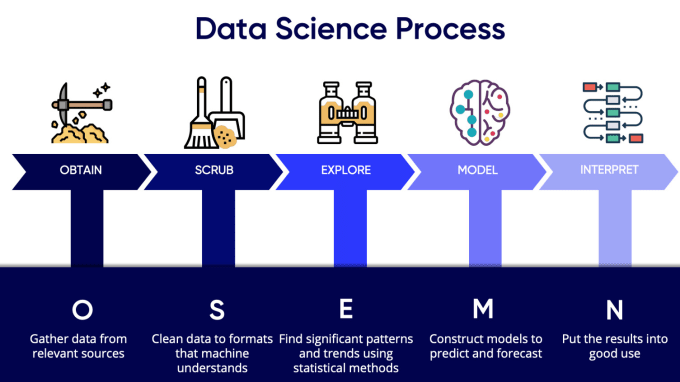

In [111]:
image_magic(3)

Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.It is a good practice to understand the data first and try to gather as many insights from it. EDA is all about making sense of data in hand,before getting them "dirty" with it.

In [112]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


In [113]:
train_df["sentiment"].describe()

count    15819.000000
mean         0.917504
std          0.836537
min         -1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          2.000000
Name: sentiment, dtype: float64

In [114]:
train_df.shape

(15819, 3)

In [115]:
def eda_graphs(df):
    solution = [(values/df['sentiment'].sum())*100 for values in df['sentiment'].value_counts()]
    data_frame = pd.DataFrame(solution)
    data_frame['percentage'] = pd.DataFrame(solution)
    data_frame['class']= pd.DataFrame(df['sentiment'].value_counts()).index
    data_frame = data_frame.drop(data_frame.columns[0],axis = 'columns')
    fig = px.bar(data_frame, x=data_frame['class'], y=data_frame['percentage'], color=data_frame['class'])
    graph = fig.show()
    return(data_frame)
    return(graph)

In [116]:
eda_graphs(train_df)

,percentage,class
0,58.770842,1
1,25.079234,2
2,16.211933,0
3,8.929310,-1


In [117]:
def special_char_count(df):
    df["special_character_count"] = df["message"].apply(lambda character: sum(not character.isalpha() 
                                                                              for characters in character ))
    return(df)

In [118]:
special_char_count(train_df).head()

,sentiment,message,tweetid,special_character_count
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,140
1,1,It's not like we lack evidence of anthropogeni...,126103,62
2,2,RT @RawStory: Researchers say we have three ye...,698562,140
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,99
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,122


In [119]:
def word_count(df):
    df['word count'] = df['message'].apply(lambda t: len(t.split()))
    return(df)

In [120]:
word_count(train_df)

,sentiment,message,tweetid,special_character_count,word count
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,140,19
1,1,It's not like we lack evidence of anthropogeni...,126103,62,10
2,2,RT @RawStory: Researchers say we have three ye...,698562,140,19
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,99,15
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,122,18
...,...,...,...,...,...
15814,1,RT @ezlusztig: They took down the material on ...,22001,140,22
15815,2,RT @washingtonpost: How climate change could b...,17856,119,13
15816,0,notiven: RT: nytimesworld :What does Trump act...,384248,133,19
15817,-1,RT @sara8smiles: Hey liberals the climate chan...,819732,128,21


In [121]:
train_df["special_character_count"].describe()

count    15819.000000
mean       123.774132
std         23.332433
min         14.000000
25%        114.000000
50%        133.000000
75%        140.000000
max        208.000000
Name: special_character_count, dtype: float64

In [122]:
def tweetid_count(df):
    tweetid_counts = df["tweetid"].value_counts().sum()
    return(tweetid_counts)

In [123]:
tweetid_count(train_df)

15819

In [124]:
def unique_tweetid_count(df):
    unique_tweetid = df["tweetid"].nunique()
    return(unique_tweetid)

In [125]:
unique_tweetid_count(train_df)

15819

In [126]:
def word_cloud(df):
    comment_words = '' 
    stopwords = set(STOPWORDS) 

    # iterate through the csv file 
    for val in df["message"]: 

        # typecaste each val to string 
        val = str(val) 

        # split the value 
        tokens = val.split() 

        # Converts each token into lowercase 
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 

        comment_words += " ".join(tokens)+" "

    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='white', 
                    stopwords = stopwords, 
                    min_font_size = 10).generate(comment_words) 

    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    return(plt.show()) 

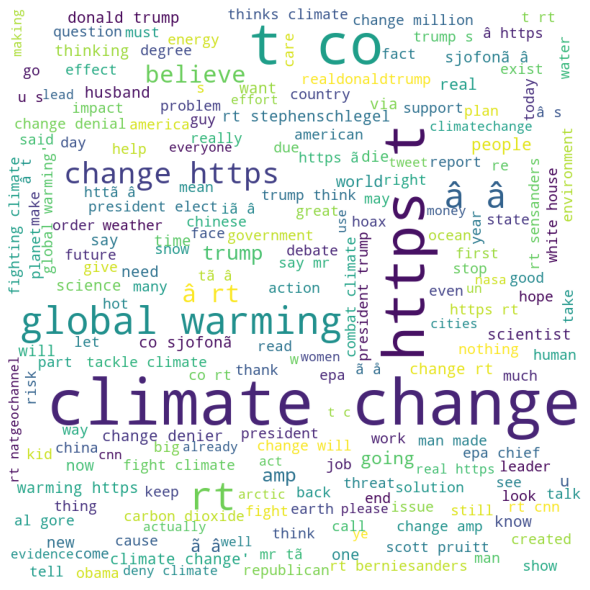

In [127]:
word_cloud(train_df)

> Observations

- The following observations where made:
    - The tweets all came from unique tweet id's;
        - The values from each column do not contain null values or empty strings;
        - The average tweets have roughly 124 characters (including special characters and blank spaces);
        - The shortest tweet is 14 characters long;
        - The longest tweet is 208 characters long. 
        
- The data types within the train_df:
    - sentiment int64   
    - message object   
    - tweetid int64
        - The message column consists of string or text values that need to be explored and cleaned before modelling;
        - Just because a type is not numeric does not mean it will not be useful or important when modelling.
        
- The mean is observed to be higher than the median and there is a big difference between the 75th percentile and the maximum value which could indicate there maybe be outliers within the dataset.

## Data Pre-processing

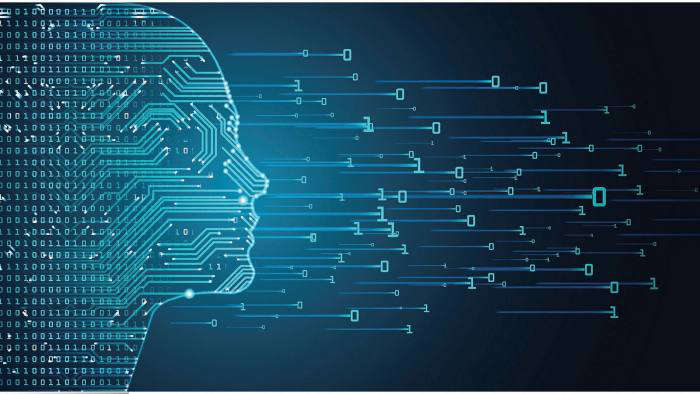

In [128]:
image_magic(4)

Data preprocessing aims to facilitate the training/testing process by appropriately transforming and scaling the entire dataset. Preprocessing is necessary before training the machine learning models. Preprocessing removes outliers and scales the features to an equivalent range. We use min-max scaling that ensures fast convergence of the gradient-based learning process, especially for neural network models.

## Text Cleaning
### Removing Noise

In text analytics, removing noise (i.e. unneccesary information) is a key part of getting the data into a usable format.  Some techniques are standard, but we have taken certain measures to limit the noise in the message column of our data.

For the EDSA - Climate Change Belief Analysis 2021 the dataset we will be doing the following steps:
* removing the web-urls
* making everything lower case
* removing punctuation
* Splitting tweets
* Stemming the words:
        * Stemming is the process of transforming to the root word. It uses an algorithm that removes
           common word-endings from English words, such as “ly,” “es,” “ed,” and “s.” 
          For example, assuming for an analysis you may want to consider “carefully,” “cared,” “cares,” “caringly” as “care” instead of separate words. There are three widely used stemming algorithms, namely:
            * Porter
            * Lancaster
            * Snowball
        Out of these three, we will be using the `SnowballStemmer`.
* Lemmatization:
            * A very similar operation to stemming is called lemmatization. Lemmatizing is the process of grouping words of similar meaning together. So, your root stem, meaning the word you end up with, is not something you can just look up in a dictionary, but you can look up a lemma.
* Stop words (Stop words are words which do not contain important significance to be used in Search Queries. Usually these words are filtered out from search queries because they return a vast amount of unnecessary information).

In [129]:
def remove_punctuation(text):
    return ''.join([words for words in text if words not in string.punctuation])

In [130]:
def clean_message(df):
    df["clean_message"] = df["message"].apply(remove_punctuation)
    return(df)

In [131]:
clean_message(train_df)

,sentiment,message,tweetid,special_character_count,word count,clean_message
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,140,19,PolySciMajor EPA chief doesnt think carbon dio...
1,1,It's not like we lack evidence of anthropogeni...,126103,62,10,Its not like we lack evidence of anthropogenic...
2,2,RT @RawStory: Researchers say we have three ye...,698562,140,19,RT RawStory Researchers say we have three year...
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,99,15,TodayinMaker WIRED 2016 was a pivotal year in...
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,122,18,RT SoyNovioDeTodas Its 2016 and a racist sexis...
...,...,...,...,...,...,...
15814,1,RT @ezlusztig: They took down the material on ...,22001,140,22,RT ezlusztig They took down the material on gl...
15815,2,RT @washingtonpost: How climate change could b...,17856,119,13,RT washingtonpost How climate change could be ...
15816,0,notiven: RT: nytimesworld :What does Trump act...,384248,133,19,notiven RT nytimesworld What does Trump actual...
15817,-1,RT @sara8smiles: Hey liberals the climate chan...,819732,128,21,RT sara8smiles Hey liberals the climate change...


In [132]:
def split_tweets(df):
    df["split_tweets"] = [tweets.split() for tweets in df["clean_message"]]
    return(df)

In [133]:
split_tweets(train_df).head()

,sentiment,message,tweetid,special_character_count,word count,clean_message,split_tweets
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,140,19,PolySciMajor EPA chief doesnt think carbon dio...,"[PolySciMajor, EPA, chief, doesnt, think, carb..."
1,1,It's not like we lack evidence of anthropogeni...,126103,62,10,Its not like we lack evidence of anthropogenic...,"[Its, not, like, we, lack, evidence, of, anthr..."
2,2,RT @RawStory: Researchers say we have three ye...,698562,140,19,RT RawStory Researchers say we have three year...,"[RT, RawStory, Researchers, say, we, have, thr..."
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,99,15,TodayinMaker WIRED 2016 was a pivotal year in...,"[TodayinMaker, WIRED, 2016, was, a, pivotal, y..."
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,122,18,RT SoyNovioDeTodas Its 2016 and a racist sexis...,"[RT, SoyNovioDeTodas, Its, 2016, and, a, racis..."


In [134]:
def text_stemmer(words, stemmer):
    return [stemmer.stem(word) for word in words]

In [135]:
def stemmed_text (df):
    df['stem'] = df["split_tweets"].apply(text_stemmer, args=(stemmer, ))
    return(df)

In [136]:
stemmed_text (train_df).head()

,sentiment,message,tweetid,special_character_count,word count,clean_message,split_tweets,stem
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,140,19,PolySciMajor EPA chief doesnt think carbon dio...,"[PolySciMajor, EPA, chief, doesnt, think, carb...","[polyscimajor, epa, chief, doesnt, think, carb..."
1,1,It's not like we lack evidence of anthropogeni...,126103,62,10,Its not like we lack evidence of anthropogenic...,"[Its, not, like, we, lack, evidence, of, anthr...","[it, not, like, we, lack, evid, of, anthropoge..."
2,2,RT @RawStory: Researchers say we have three ye...,698562,140,19,RT RawStory Researchers say we have three year...,"[RT, RawStory, Researchers, say, we, have, thr...","[rt, rawstori, research, say, we, have, three,..."
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,99,15,TodayinMaker WIRED 2016 was a pivotal year in...,"[TodayinMaker, WIRED, 2016, was, a, pivotal, y...","[todayinmak, wire, 2016, was, a, pivot, year, ..."
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,122,18,RT SoyNovioDeTodas Its 2016 and a racist sexis...,"[RT, SoyNovioDeTodas, Its, 2016, and, a, racis...","[rt, soynoviodetoda, it, 2016, and, a, racist,..."


In [137]:
def df_lemma(words, lemmatizer):
    return [lemmatizer.lemmatize(word) for word in words]

In [138]:
def word_lemma(df):
    df['lemma'] = df['stem'].apply(df_lemma, args=(lemmatizer, ))
    return(df)

In [139]:
word_lemma(train_df).head()

,sentiment,message,tweetid,special_character_count,word count,clean_message,split_tweets,stem,lemma
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,140,19,PolySciMajor EPA chief doesnt think carbon dio...,"[PolySciMajor, EPA, chief, doesnt, think, carb...","[polyscimajor, epa, chief, doesnt, think, carb...","[polyscimajor, epa, chief, doesnt, think, carb..."
1,1,It's not like we lack evidence of anthropogeni...,126103,62,10,Its not like we lack evidence of anthropogenic...,"[Its, not, like, we, lack, evidence, of, anthr...","[it, not, like, we, lack, evid, of, anthropoge...","[it, not, like, we, lack, evid, of, anthropoge..."
2,2,RT @RawStory: Researchers say we have three ye...,698562,140,19,RT RawStory Researchers say we have three year...,"[RT, RawStory, Researchers, say, we, have, thr...","[rt, rawstori, research, say, we, have, three,...","[rt, rawstori, research, say, we, have, three,..."
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,99,15,TodayinMaker WIRED 2016 was a pivotal year in...,"[TodayinMaker, WIRED, 2016, was, a, pivotal, y...","[todayinmak, wire, 2016, was, a, pivot, year, ...","[todayinmak, wire, 2016, wa, a, pivot, year, i..."
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,122,18,RT SoyNovioDeTodas Its 2016 and a racist sexis...,"[RT, SoyNovioDeTodas, Its, 2016, and, a, racis...","[rt, soynoviodetoda, it, 2016, and, a, racist,...","[rt, soynoviodetoda, it, 2016, and, a, racist,..."


In [140]:
def remove_stop_words(tokens):    
    return [words for words in tokens if words not in stopwords.words('english')]

In [141]:
def no_stop_words(df):
    df["no_stop_words"] = df["lemma"].apply(remove_stop_words)
    df = df.drop(["split_tweets","stem","lemma"],axis = 1)
    return(df)

In [142]:
no_stop_words(train_df).head()

,sentiment,message,tweetid,special_character_count,word count,clean_message,no_stop_words
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,140,19,PolySciMajor EPA chief doesnt think carbon dio...,"[polyscimajor, epa, chief, doesnt, think, carb..."
1,1,It's not like we lack evidence of anthropogeni...,126103,62,10,Its not like we lack evidence of anthropogenic...,"[like, lack, evid, anthropogen, global, warm]"
2,2,RT @RawStory: Researchers say we have three ye...,698562,140,19,RT RawStory Researchers say we have three year...,"[rt, rawstori, research, say, three, year, act..."
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,99,15,TodayinMaker WIRED 2016 was a pivotal year in...,"[todayinmak, wire, 2016, wa, pivot, year, war,..."
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,122,18,RT SoyNovioDeTodas Its 2016 and a racist sexis...,"[rt, soynoviodetoda, 2016, racist, sexist, cli..."


In [143]:
def hashtags_and_http(df):
    df["hashtags"] = df.message.str.findall(r'#.*?(?=\s|$)')
    df["hashtags"] = [''.join(map(str, lists)).lower() for lists in df['hashtags']]
    df["web_pages"] = df.message.str.findall(r'https?://\S+')
    df["web_pages"] = [''.join(map(str, lists)).lower() for lists in df['web_pages']]
    pattern_url = r'https?://\S+'
    subs_url = r'url-web'
    df['post'] = df['web_pages'].replace(to_replace = pattern_url, value = subs_url, regex = True)
    df["hashtags"] = df["hashtags"].apply(remove_punctuation)
    return(df)

In [144]:
hashtags_and_http(train_df).head()

,sentiment,message,tweetid,special_character_count,word count,clean_message,split_tweets,stem,lemma,no_stop_words,hashtags,web_pages,post
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,140,19,PolySciMajor EPA chief doesnt think carbon dio...,"[PolySciMajor, EPA, chief, doesnt, think, carb...","[polyscimajor, epa, chief, doesnt, think, carb...","[polyscimajor, epa, chief, doesnt, think, carb...","[polyscimajor, epa, chief, doesnt, think, carb...",,https://t.co/yelvcefxkc,url-web
1,1,It's not like we lack evidence of anthropogeni...,126103,62,10,Its not like we lack evidence of anthropogenic...,"[Its, not, like, we, lack, evidence, of, anthr...","[it, not, like, we, lack, evid, of, anthropoge...","[it, not, like, we, lack, evid, of, anthropoge...","[like, lack, evid, anthropogen, global, warm]",,,
2,2,RT @RawStory: Researchers say we have three ye...,698562,140,19,RT RawStory Researchers say we have three year...,"[RT, RawStory, Researchers, say, we, have, thr...","[rt, rawstori, research, say, we, have, three,...","[rt, rawstori, research, say, we, have, three,...","[rt, rawstori, research, say, three, year, act...",,https://t.co/wdt0kdur2fhttps://t.co/z0anpt…,url-web
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,99,15,TodayinMaker WIRED 2016 was a pivotal year in...,"[TodayinMaker, WIRED, 2016, was, a, pivotal, y...","[todayinmak, wire, 2016, was, a, pivot, year, ...","[todayinmak, wire, 2016, wa, a, pivot, year, i...","[todayinmak, wire, 2016, wa, pivot, year, war,...",todayinmaker,https://t.co/44wotxtlcd,url-web
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,122,18,RT SoyNovioDeTodas Its 2016 and a racist sexis...,"[RT, SoyNovioDeTodas, Its, 2016, and, a, racis...","[rt, soynoviodetoda, it, 2016, and, a, racist,...","[rt, soynoviodetoda, it, 2016, and, a, racist,...","[rt, soynoviodetoda, 2016, racist, sexist, cli...",electionnight,,


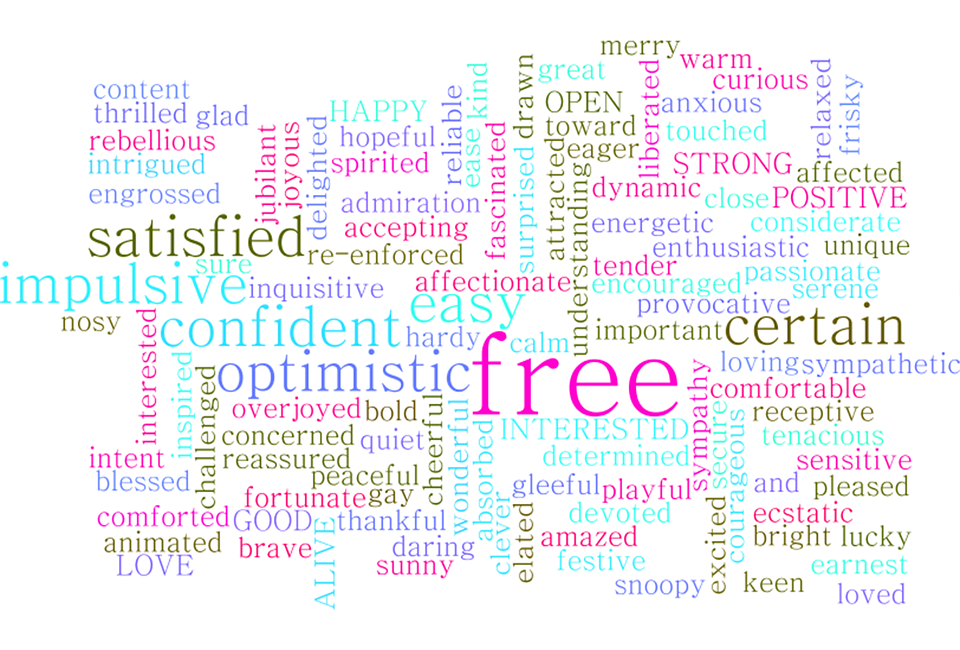

In [145]:
image_magic(5)

Hashtags and web url's play a significant role in the sentiment value being allocated to the tweet. Majority of the tweets with sentiment 1 (News sentiment), contained a number of links to pages containing news pertaining the 'Climate Change' topic being discussed. Counting the hashtags and showing the trend between hashtag and sentiment aided in understanding the data. We will continue with ***Cleaning Text***

In [146]:
def hashtag_counter(df):
    new_df = pd.DataFrame(df["hashtags"].value_counts())
    new_df["hashtag"] = pd.DataFrame(df["hashtags"].value_counts()).index
    new_df["hashtag_count"] = pd.DataFrame(df["hashtags"].value_counts())
    new_df = new_df.reset_index()
    new_df =new_df.drop(new_df.columns[0],axis = 'columns')
    new_df =new_df.drop(new_df.columns[0],axis = 'columns')
    new_df = new_df[1:21]
    fig = px.bar(new_df, x=new_df["hashtag"], y=new_df["hashtag_count"], color=new_df["hashtag"])
    fig.show()
    return(new_df)

In [147]:
hashtag_counter(train_df)

,hashtag,hashtag_count
1,climate,158
2,beforetheflood,141
3,climatechange,88
4,imvotingbecause,60
5,trump,40
6,parisagreement,37
7,ivotedbecauseã¢â‚¬â¦,32
8,climateenvironment,27
9,cop22,25
10,qanda,19


In [148]:
def hash_tag_counter(df):
    pandas_d = pd.DataFrame()
    pandas_d["sentiment"] = np.where((df["sentiment"] != '') & (df["hashtags"] != '')
                             ,df["sentiment"], np.nan)
    pandas_d["hashtags"] =  np.where((df["sentiment"] != '') & (df["hashtags"] != '')
                             ,df["hashtags"], np.nan)
    pandas_d = pandas_d.dropna(subset = ["hashtags"], inplace=False)

    return(pandas_d.groupby(['sentiment']).count())

Sorting the hashtags into their 'sentiment' groups, the following was observed: * Sentiment 1 (tweets supporting climate change, Pro-tweets), have majority hashtags due to the imbalance of the data; * Sentiment 2 (tweets pertaining to news) came in second and this led me to believe that if the data was balanced, majority of the hashtags would have had the same trend as websites.

In [149]:
hash_tag_counter(train_df)

,hashtags
sentiment,
-1.0,172
0.0,310
1.0,1801
2.0,588


After observing the above trends, we took a further dive into understanding the data. The below the code was used to seperate the top 20 hashtags into the relevant 'Sentiment' groups to aid us in further obtaining a more precise predictive model.

In [150]:
def tiresome_code():
    new_df = pd.DataFrame(train_df["hashtags"].value_counts())
    new_df["hashtag"] = pd.DataFrame(train_df["hashtags"].value_counts()).index
    new_df["hashtag_count"] = pd.DataFrame(train_df["hashtags"].value_counts())
    new_df = new_df.reset_index()
    new_df =new_df.drop(new_df.columns[0],axis = 'columns')
    new_df =new_df.drop(new_df.columns[0],axis = 'columns')
    new_df = new_df[1:21]
    lists = [vales for vales in new_df["hashtag"]]

    pandas_d = pd.DataFrame()
    pandas_d["sentiment"] = np.where((train_df["sentiment"] != '') & (train_df["hashtags"] != '')
                                 ,train_df["sentiment"], np.nan)
    pandas_d["hashtags"] =  np.where((train_df["sentiment"] != '') & (train_df["hashtags"] != '')
                                 ,train_df["hashtags"], np.nan)
    pandas_d = pandas_d.dropna(subset = ["hashtags"], inplace=False)
    trial = pd.DataFrame()
    trial["hashtags"] = [hashtags for hashtags in pandas_d["hashtags"] if hashtags in lists]
    trial["sentiment"] = train_df["sentiment"]
    guess1 = trial.loc[(trial['sentiment'] == -1) & (trial['hashtags'] == "climate"), 'sentiment'].count()
    guess2 = trial.loc[(trial['sentiment'] == 0) & (trial['hashtags'] == "climate"), 'sentiment'].count()
    guess3 = trial.loc[(trial['sentiment'] == 1) & (trial['hashtags'] == "climate"), 'sentiment'].count()
    guess4 = trial.loc[(trial['sentiment'] == 2) & (trial['hashtags'] == "climate"), 'sentiment'].count()
    guess5 = trial.loc[(trial['sentiment'] == -1) & (trial['hashtags'] == "beforetheflood"), 'sentiment'].count()
    guess6 = trial.loc[(trial['sentiment'] == 0) & (trial['hashtags'] == "beforetheflood"), 'sentiment'].count()
    guess7 = trial.loc[(trial['sentiment'] == 1) & (trial['hashtags'] == "beforetheflood"), 'sentiment'].count()
    guess8 = trial.loc[(trial['sentiment'] == 2) & (trial['hashtags'] == "beforetheflood"), 'sentiment'].count()
    guess9 = trial.loc[(trial['sentiment'] == -1) & (trial['hashtags'] == "climatechange"), 'sentiment'].count()
    guess10 = trial.loc[(trial['sentiment'] == 0) & (trial['hashtags'] == "climatechange"), 'sentiment'].count()
    guess11 = trial.loc[(trial['sentiment'] == 1) & (trial['hashtags'] == "climatechange"), 'sentiment'].count()
    guess12 = trial.loc[(trial['sentiment'] == 2) & (trial['hashtags'] == "climatechange"), 'sentiment'].count()
    guess13 = trial.loc[(trial['sentiment'] == -1) & (trial['hashtags'] == "imvotingbecause"), 'sentiment'].count()
    guess14 = trial.loc[(trial['sentiment'] == 0) & (trial['hashtags'] == "imvotingbecause"), 'sentiment'].count()
    guess15 = trial.loc[(trial['sentiment'] == 1) & (trial['hashtags'] == "imvotingbecause"), 'sentiment'].count()
    guess16 = trial.loc[(trial['sentiment'] == 2) & (trial['hashtags'] == "imvotingbecause"), 'sentiment'].count()
    guess17 = trial.loc[(trial['sentiment'] == -1) & (trial['hashtags'] == "trump"), 'sentiment'].count()
    guess18 = trial.loc[(trial['sentiment'] == 0) & (trial['hashtags'] == "trump"), 'sentiment'].count()
    guess19 = trial.loc[(trial['sentiment'] == 1) & (trial['hashtags'] == "trump"), 'sentiment'].count()
    guess20 = trial.loc[(trial['sentiment'] == 2) & (trial['hashtags'] == "trump"), 'sentiment'].count()
    guess21 = trial.loc[(trial['sentiment'] == -1) & (trial['hashtags'] == "ivotedbecauseã¢â‚¬â¦"), 'sentiment'].count()
    guess22 = trial.loc[(trial['sentiment'] == 0) & (trial['hashtags'] == "ivotedbecauseã¢â‚¬â¦"), 'sentiment'].count()
    guess23 = trial.loc[(trial['sentiment'] == 1) & (trial['hashtags'] == "ivotedbecauseã¢â‚¬â¦"), 'sentiment'].count()
    guess24 = trial.loc[(trial['sentiment'] == 2) & (trial['hashtags'] == "ivotedbecauseã¢â‚¬â¦"), 'sentiment'].count()
    guess25 = trial.loc[(trial['sentiment'] == -1) & (trial['hashtags'] == "parisagreement"), 'sentiment'].count()
    guess26 = trial.loc[(trial['sentiment'] == 0) & (trial['hashtags'] == "parisagreement"), 'sentiment'].count()
    guess27 = trial.loc[(trial['sentiment'] == 1) & (trial['hashtags'] == "parisagreement"), 'sentiment'].count()
    guess28 = trial.loc[(trial['sentiment'] == 2) & (trial['hashtags'] == "parisagreement"), 'sentiment'].count()
    guess29 = trial.loc[(trial['sentiment'] == -1) & (trial['hashtags'] == "climateenvironment"), 'sentiment'].count()
    guess30 = trial.loc[(trial['sentiment'] == 0) & (trial['hashtags'] == "climateenvironment"), 'sentiment'].count()
    guess31 = trial.loc[(trial['sentiment'] == 1) & (trial['hashtags'] == "climateenvironment"), 'sentiment'].count()
    guess32 = trial.loc[(trial['sentiment'] == 2) & (trial['hashtags'] == "climateenvironment"), 'sentiment'].count()
    guess33 = trial.loc[(trial['sentiment'] == -1) & (trial['hashtags'] == "cop22"), 'sentiment'].count()
    guess34 = trial.loc[(trial['sentiment'] == 0) & (trial['hashtags'] == "cop22"), 'sentiment'].count()
    guess35 = trial.loc[(trial['sentiment'] == 1) & (trial['hashtags'] == "cop22"), 'sentiment'].count()
    guess36 = trial.loc[(trial['sentiment'] == 2) & (trial['hashtags'] == "cop22"), 'sentiment'].count()
    guess37 = trial.loc[(trial['sentiment'] == -1) & (trial['hashtags'] == "qanda"), 'sentiment'].count()
    guess38 = trial.loc[(trial['sentiment'] == 0) & (trial['hashtags'] == "qanda"), 'sentiment'].count()
    guess39 = trial.loc[(trial['sentiment'] == 1) & (trial['hashtags'] == "qanda"), 'sentiment'].count()
    guess40 = trial.loc[(trial['sentiment'] == 2) & (trial['hashtags'] == "qanda"), 'sentiment'].count()
    guess41 = trial.loc[(trial['sentiment'] == -1) & (trial['hashtags'] == "climatemarch"), 'sentiment'].count()
    guess42 = trial.loc[(trial['sentiment'] == 0) & (trial['hashtags'] == "climatemarch"), 'sentiment'].count()
    guess43 = trial.loc[(trial['sentiment'] == 1) & (trial['hashtags'] == "climatemarch"), 'sentiment'].count()
    guess44 = trial.loc[(trial['sentiment'] == 2) & (trial['hashtags'] == "climatemarch"), 'sentiment'].count()
    guess45 = trial.loc[(trial['sentiment'] == -1) & (trial['hashtags'] == "science"), 'sentiment'].count()
    guess46 = trial.loc[(trial['sentiment'] == 0) & (trial['hashtags'] == "science"), 'sentiment'].count()
    guess47 = trial.loc[(trial['sentiment'] == 1) & (trial['hashtags'] == "science"), 'sentiment'].count()
    guess48 = trial.loc[(trial['sentiment'] == 2) & (trial['hashtags'] == "science"), 'sentiment'].count()
    guess49 = trial.loc[(trial['sentiment'] == -1) & (trial['hashtags'] == "auspol"), 'sentiment'].count()
    guess50 = trial.loc[(trial['sentiment'] == 0) & (trial['hashtags'] == "auspol"), 'sentiment'].count()
    guess51 = trial.loc[(trial['sentiment'] == 1) & (trial['hashtags'] == "auspol"), 'sentiment'].count()
    guess52 = trial.loc[(trial['sentiment'] == 2) & (trial['hashtags'] == "auspol"), 'sentiment'].count()
    guess53 = trial.loc[(trial['sentiment'] == -1) & (trial['hashtags'] == "globalwarming"), 'sentiment'].count()
    guess54 = trial.loc[(trial['sentiment'] == 0) & (trial['hashtags'] == "globalwarming"), 'sentiment'].count()
    guess55 = trial.loc[(trial['sentiment'] == 1) & (trial['hashtags'] == "globalwarming"), 'sentiment'].count()
    guess56 = trial.loc[(trial['sentiment'] == 2) & (trial['hashtags'] == "globalwarming"), 'sentiment'].count()
    guess57 = trial.loc[(trial['sentiment'] == -1) & (trial['hashtags'] == "trumpnã¢â‚¬â¦"), 'sentiment'].count()
    guess58 = trial.loc[(trial['sentiment'] == 0) & (trial['hashtags'] == "trumpnã¢â‚¬â¦"), 'sentiment'].count()
    guess59 = trial.loc[(trial['sentiment'] == 1) & (trial['hashtags'] == "trumpnã¢â‚¬â¦"), 'sentiment'].count()
    guess60 = trial.loc[(trial['sentiment'] == 2) & (trial['hashtags'] == "trumpnã¢â‚¬â¦"), 'sentiment'].count()
    guess61 = trial.loc[(trial['sentiment'] == -1) & (trial['hashtags'] == "greatbarrierreef"), 'sentiment'].count()
    guess62 = trial.loc[(trial['sentiment'] == 0) & (trial['hashtags'] == "greatbarrierreef"), 'sentiment'].count()
    guess63 = trial.loc[(trial['sentiment'] == 1) & (trial['hashtags'] == "greatbarrierreef"), 'sentiment'].count()
    guess64 = trial.loc[(trial['sentiment'] == 2) & (trial['hashtags'] == "greatbarrierreef"), 'sentiment'].count()
    guess65 = trial.loc[(trial['sentiment'] == -1) & (trial['hashtags'] == "actonclimate"), 'sentiment'].count()
    guess66 = trial.loc[(trial['sentiment'] == 0) & (trial['hashtags'] == "actonclimate"), 'sentiment'].count()
    guess67 = trial.loc[(trial['sentiment'] == 1) & (trial['hashtags'] == "actonclimate"), 'sentiment'].count()
    guess68 = trial.loc[(trial['sentiment'] == 2) & (trial['hashtags'] == "actonclimate"), 'sentiment'].count()
    guess69 = trial.loc[(trial['sentiment'] == -1) & (trial['hashtags'] == "earthday"), 'sentiment'].count()
    guess70 = trial.loc[(trial['sentiment'] == 0) & (trial['hashtags'] == "earthday"), 'sentiment'].count()
    guess71 = trial.loc[(trial['sentiment'] == 1) & (trial['hashtags'] == "earthday"), 'sentiment'].count()
    guess72 = trial.loc[(trial['sentiment'] == 2) & (trial['hashtags'] == "earthday"), 'sentiment'].count()
    guess73 = trial.loc[(trial['sentiment'] == -1) & (trial['hashtags'] == "electionnight"), 'sentiment'].count()
    guess74 = trial.loc[(trial['sentiment'] == 0) & (trial['hashtags'] == "electionnight"), 'sentiment'].count()
    guess75 = trial.loc[(trial['sentiment'] == 1) & (trial['hashtags'] == "electionnight"), 'sentiment'].count()
    guess76 = trial.loc[(trial['sentiment'] == 2) & (trial['hashtags'] == "electionnight"), 'sentiment'].count()
    guess77 = trial.loc[(trial['sentiment'] == -1) & (trial['hashtags'] == "exxonknew"), 'sentiment'].count()
    guess78 = trial.loc[(trial['sentiment'] == 0) & (trial['hashtags'] == "exxonknew"), 'sentiment'].count()
    guess79 = trial.loc[(trial['sentiment'] == 1) & (trial['hashtags'] == "exxonknew"), 'sentiment'].count()
    guess80 = trial.loc[(trial['sentiment'] == 2) & (trial['hashtags'] == "exxonknew"), 'sentiment'].count()

    trial_error = np.array([[-1 ,"climate",guess1],[0 ,"climate",guess2],[1 ,"climate",guess3],[2, "climate",guess4],
    [-1,"beforetheflood",guess5],[0,"beforetheflood",guess6],[1,"beforetheflood",guess7],
    [2,"beforetheflood",guess8],[-1,"climatechange",guess9],[0,"climatechange",guess10],
    [1,"climatechange",guess11],[2,"climatechange",guess12],[-1,"imvotingbecause",guess13],
    [0,"imvotingbecause",guess14],[1,"imvotingbecause",guess15],[2,"imvotingbecause",guess16],
    [-1,"trump",guess17],[0,"trump",guess18],[1,"trump",guess19],[2,"trump",guess20],
    [-1,"ivotedbecauseã¢â‚¬â",guess21],[0,"ivotedbecauseã¢â‚¬â",guess22],[1,"ivotedbecauseã¢â‚¬â",guess23],
    [2,"ivotedbecauseã¢â‚¬â",guess24],[-1,"parisagreement",guess25],[0,"parisagreement",guess26],
    [1,"parisagreement",guess27],[2,"parisagreement",guess28],[-1,"climateenvironment",guess29],
    [0,"climateenvironment",guess30],[1,"climateenvironment",guess31],[2,"climateenvironment",guess32],
    [-1,"cop22",guess33],[0,"cop22",guess34],[1,"cop22",guess35],[2,"cop22",guess36],[-1,"qanda",guess37],
    [0,"qanda",guess38],[1,"qanda",guess39],[2,"qanda",guess40],[-1,"climatemarch",guess41],[0,"climatemarch",guess42],
    [1,"climatemarch",guess43],[2,"climatemarch",guess44],[-1,"science",guess45],[0,"science",guess46],
    [1,"science",guess47],[2,"science",guess48],[-1,"auspol",guess49],[0,"auspol",guess50],
    [1,"auspol",guess51],[2,"auspol",guess52],[-1,"globalwarming",guess53],[0,"globalwarming",guess54],
    [1,"globalwarming",guess55],[2,"globalwarming",guess56],[-1,"trumpnã¢â‚¬â",guess57],
    [0,"trumpnã¢â‚¬â",guess58],[1,"trumpnã¢â‚¬â",guess59],[2,"trumpnã¢â‚¬â",guess60],
    [-1,"greatbarrierreef",guess61],[0,"greatbarrierreef",guess62],[1,"greatbarrierreef",guess63],
    [2,"greatbarrierreef",guess64],[-1,"actonclimate",guess65],[0,"actonclimate",guess66],
    [1,"actonclimate",guess67],[2,"actonclimate",guess68],[-1,"earthday",guess69],
    [0,"earthday",guess70],[1,"earthday",guess71],[2,"earthday",guess72],
    [-1,"electionnight",guess73],[0,"electionnight",guess74],[1,"electionnight",guess75],
    [2,"electionnight",guess76],[-1,"exxonknew",guess77],[0,"exxonknew",guess78],[1,"exxonknew",guess79],
    [2,"exxonknew",guess80]])
    
    trial_error_df = pd.DataFrame({'sentiment': trial_error[:, 0], 
                                   'common_hash_tag': trial_error[:, 1],
                                  'hash_tag_count': trial_error[:, 2]})
    
    fig = px.bar(new_df, x=trial_error_df["common_hash_tag"], 
                 y=trial_error_df["hash_tag_count"], 
                 color=trial_error_df["sentiment"])
    fig.show()
    
    return(trial_error_df)

In [151]:
tiresome_code().head()

,sentiment,common_hash_tag,hash_tag_count
0,-1,climate,13
1,0,climate,30
2,1,climate,80
3,2,climate,35
4,-1,beforetheflood,8


In [152]:
pandas_d = pd.DataFrame()
pandas_d["sentiment"] = np.where((train_df["sentiment"] != '') & (train_df["hashtags"] != '')
                                 ,train_df["sentiment"], np.nan)
pandas_d["hashtags"] =  np.where((train_df["sentiment"] != '') & (train_df["hashtags"] != '')
                                 ,train_df["hashtags"], np.nan)
pandas_d = pandas_d.dropna(subset = ["hashtags"], inplace=False)
pandas_d.head()

,sentiment,hashtags
3,1.0,todayinmaker
4,1.0,electionnight
13,1.0,climatemarch
20,1.0,saveourplanet
21,1.0,cop22earthtomarrakech


Our four 'Sentiment' classes are imbalanced. To put this in perspective as to why this is such an issue, say we had a model that always predicts that a given tweet is 'Pro-climate-change' (clearly a really bad model!). Such a model would achieve a low accuracy. Class imbalance can be a serious problem if left unchecked.

Notice that we are keeping our features and labels together for the time being so that they get sampled together (otherwise we risk mixing labels and observations):

In [153]:
News = train_df[train_df['sentiment']==2]
Pro = train_df[train_df['sentiment']==1]
Neutral = train_df[train_df['sentiment']==0]
Anti = train_df[train_df['sentiment']==-1]

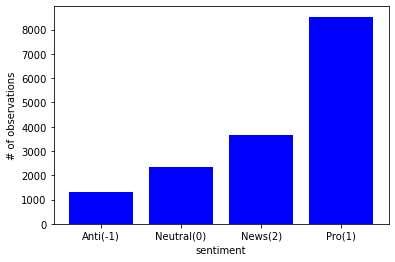

In [154]:
labels = train_df['sentiment'].unique()
heights = [len(News),len(Pro),len(Neutral),len(Anti)]
plt.bar(labels,heights,color='blue')
plt.xticks(labels,['News(2)','Pro(1)','Neutral(0)','Anti(-1)'])
plt.xlabel("sentiment")
plt.ylabel("# of observations")
plt.show()

The majority of the tweets will definetly favour the 'Pro-climate change' sentiment class, if left unchecked it will affect the model in the long run and temper with the results. The following code was used to rectify the imbalance to our best capabilities enhancing the model and results in the long-run.
Both down-sampling and upsampling techniques were used.
Down-sampling:
* Since the `sentiment 1` class has so many observations, we can reduce it's size by taking a small random subset of observations to match the size of the overall averages of the classes.
Upsampling:
* Since the `sentiment -1` class has less observations, we can increase it's size by taking a small random subset of observations to match the size of the overall averages of the classes.

In [155]:
 Pro_resampled = resample(Pro,
                        replace=False, 
                        n_samples=int(round((len(News)+len(Pro)+len(Anti)+len(Neutral))/4,0)),
                        random_state=27)
Anti_resampled = resample(Anti,
                        replace=True, # sample with replacement (duplicate observations)
                        n_samples=int(round((len(News)+len(Pro)+len(Anti)+len(Neutral))/4,0)),
                        random_state=27)
    
resampled = pd.concat([Pro_resampled, Anti_resampled,News,Neutral])
resampled = resampled.drop(["message","split_tweets","stem","lemma","tweetid"],axis = 1)

         
resampled.head()

,sentiment,special_character_count,word count,clean_message,no_stop_words,hashtags,web_pages,post
11729,1,129,19,RT ubcforestry Funding from GenomeBC will supp...,"[rt, ubcforestri, fund, genomebc, support, sal...",,,
8308,1,110,18,YadiMoIina gag orders Sure Hes definitely gree...,"[yadimoiina, gag, order, sure, definit, green,...",,,
7159,1,132,19,RT pattonoswalt Not ominous at all He also wan...,"[rt, pattonoswalt, omin, also, want, name, any...",,https://t.co/czp4zrovtn,url-web
5644,1,120,14,RT MelissaJPeltier In case you forgot about th...,"[rt, melissajpelti, case, forgot, chine, hoax,...",climatechange,https://t.co/fjrmdmhvs1,url-web
6732,1,146,24,RT SethMacFarlane HRC proposes installing half...,"[rt, sethmacfarlan, hrc, propos, instal, half,...",,,


In [156]:
resampled["sentiment"].value_counts()

-1    3955
 1    3955
 2    3640
 0    2353
Name: sentiment, dtype: int64

Obtaining the various hashtags and allocateing them to their respective classes, we decided to sort the hashtags into four (4) categories by use of a dictionary. The four (4) categories are: * Environmental - rows containing hashtags pertaining to the environment; * Political - rows containing hashtags of political nature; * Scientific - rows containing hashtags pertaining to science; * Other - hashtags not in the top 20 range and rows not containing any hashtags.

In [157]:
hashtag_dictionarys = {'climate':'environmental','beforetheflood':'environmental','climatechange':'environmental',
                      'climateenvironment':'environmental','climatemarch':'environmental',
                      'globalwarming':'environmental','greatbarrierreef':'environmental',
                      'actionclimate':'environmental','earthday':'environmental',
                     'imvotingbecause':'political','trump':'political','ivotedbecauseã¢â‚¬â¦':'political',
                      'parisagreement':'political','trumpnã¢â‚¬â¦':'political','cop22':'political',
                      'electionnight':'political','qanda':'scientific',
                      'science':'scientific','auspol':'scientific'}
resampled["verdict"] = [hashtag_dictionarys[values] if values in hashtag_dictionarys.keys() else 'other' for values in resampled["hashtags"]]
resampled.head()

,sentiment,special_character_count,word count,clean_message,no_stop_words,hashtags,web_pages,post,verdict
11729,1,129,19,RT ubcforestry Funding from GenomeBC will supp...,"[rt, ubcforestri, fund, genomebc, support, sal...",,,,other
8308,1,110,18,YadiMoIina gag orders Sure Hes definitely gree...,"[yadimoiina, gag, order, sure, definit, green,...",,,,other
7159,1,132,19,RT pattonoswalt Not ominous at all He also wan...,"[rt, pattonoswalt, omin, also, want, name, any...",,https://t.co/czp4zrovtn,url-web,other
5644,1,120,14,RT MelissaJPeltier In case you forgot about th...,"[rt, melissajpelti, case, forgot, chine, hoax,...",climatechange,https://t.co/fjrmdmhvs1,url-web,environmental
6732,1,146,24,RT SethMacFarlane HRC proposes installing half...,"[rt, sethmacfarlan, hrc, propos, instal, half,...",,,,other


In [158]:
resampled["postid"] = [2 if url != '' else 1 for url in resampled["post"]]

In [159]:
resampled.head()

,sentiment,special_character_count,word count,clean_message,no_stop_words,hashtags,web_pages,post,verdict,postid
11729,1,129,19,RT ubcforestry Funding from GenomeBC will supp...,"[rt, ubcforestri, fund, genomebc, support, sal...",,,,other,1
8308,1,110,18,YadiMoIina gag orders Sure Hes definitely gree...,"[yadimoiina, gag, order, sure, definit, green,...",,,,other,1
7159,1,132,19,RT pattonoswalt Not ominous at all He also wan...,"[rt, pattonoswalt, omin, also, want, name, any...",,https://t.co/czp4zrovtn,url-web,other,2
5644,1,120,14,RT MelissaJPeltier In case you forgot about th...,"[rt, melissajpelti, case, forgot, chine, hoax,...",climatechange,https://t.co/fjrmdmhvs1,url-web,environmental,2
6732,1,146,24,RT SethMacFarlane HRC proposes installing half...,"[rt, sethmacfarlan, hrc, propos, instal, half,...",,,,other,1


In [160]:
resampled.drop(["clean_message","hashtags","web_pages","post"],axis = 1).head()

,sentiment,special_character_count,word count,no_stop_words,verdict,postid
11729,1,129,19,"[rt, ubcforestri, fund, genomebc, support, sal...",other,1
8308,1,110,18,"[yadimoiina, gag, order, sure, definit, green,...",other,1
7159,1,132,19,"[rt, pattonoswalt, omin, also, want, name, any...",other,2
5644,1,120,14,"[rt, melissajpelti, case, forgot, chine, hoax,...",environmental,2
6732,1,146,24,"[rt, sethmacfarlan, hrc, propos, instal, half,...",other,1


In [161]:
resampled = resampled[['sentiment', 'special_character_count', 'word count', 'postid','verdict','no_stop_words']]

In [162]:
resampled.head()

,sentiment,special_character_count,word count,postid,verdict,no_stop_words
11729,1,129,19,1,other,"[rt, ubcforestri, fund, genomebc, support, sal..."
8308,1,110,18,1,other,"[yadimoiina, gag, order, sure, definit, green,..."
7159,1,132,19,2,other,"[rt, pattonoswalt, omin, also, want, name, any..."
5644,1,120,14,2,environmental,"[rt, melissajpelti, case, forgot, chine, hoax,..."
6732,1,146,24,1,other,"[rt, sethmacfarlan, hrc, propos, instal, half,..."


In [163]:
resampled.groupby('sentiment')['postid'].value_counts()

sentiment  postid
-1         1         2351
           2         1604
 0         1         1549
           2          804
 1         1         2151
           2         1804
 2         2         3206
           1          434
Name: postid, dtype: int64

In [164]:
resampled.groupby('sentiment')['verdict'].value_counts()

sentiment  verdict      
-1         other            3860
           environmental      51
           political          31
           scientific         13
 0         other            2310
           environmental      27
           political          12
           scientific          4
 1         other            3711
           environmental     152
           political          76
           scientific         16
 2         other            3469
           environmental     142
           political          20
           scientific          9
Name: verdict, dtype: int64

In [165]:
resampled.groupby('sentiment')['verdict'].value_counts()

sentiment  verdict      
-1         other            3860
           environmental      51
           political          31
           scientific         13
 0         other            2310
           environmental      27
           political          12
           scientific          4
 1         other            3711
           environmental     152
           political          76
           scientific         16
 2         other            3469
           environmental     142
           political          20
           scientific          9
Name: verdict, dtype: int64

In [166]:
resampled["sentiment"].value_counts()

-1    3955
 1    3955
 2    3640
 0    2353
Name: sentiment, dtype: int64

In [167]:
resampled["sentiment"].sum()

7280

In [168]:
two = resampled[resampled['sentiment']==2]
one = resampled[resampled['sentiment']==1]
zero = resampled[resampled['sentiment']==0]
negative_one = resampled[resampled['sentiment']==-1]

ValueError: The number of FixedLocator locations (4), usually from a call to set_ticks, does not match the number of ticklabels (5).

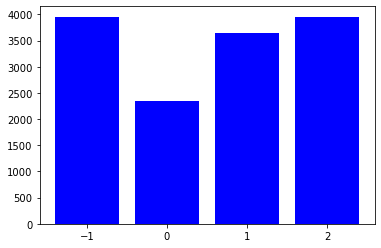

In [169]:
labels = train_df['sentiment'].unique()
heights = [len(two),len(one),len(zero),len(negative_one)]
plt.bar(labels,heights,color='blue')
plt.xticks(labels,['two','one','zero','negative_one',''])
plt.xlabel("sentiment")
plt.ylabel("# of observations")
plt.show()

In [170]:
resampled.head()

,sentiment,special_character_count,word count,postid,verdict,no_stop_words
11729,1,129,19,1,other,"[rt, ubcforestri, fund, genomebc, support, sal..."
8308,1,110,18,1,other,"[yadimoiina, gag, order, sure, definit, green,..."
7159,1,132,19,2,other,"[rt, pattonoswalt, omin, also, want, name, any..."
5644,1,120,14,2,environmental,"[rt, melissajpelti, case, forgot, chine, hoax,..."
6732,1,146,24,1,other,"[rt, sethmacfarlan, hrc, propos, instal, half,..."


After cleaing text and dropping columns we deemed unecessary, data is more suitable to obtain a predictive model that would aid us and the model to assign the relevant sentiment class.

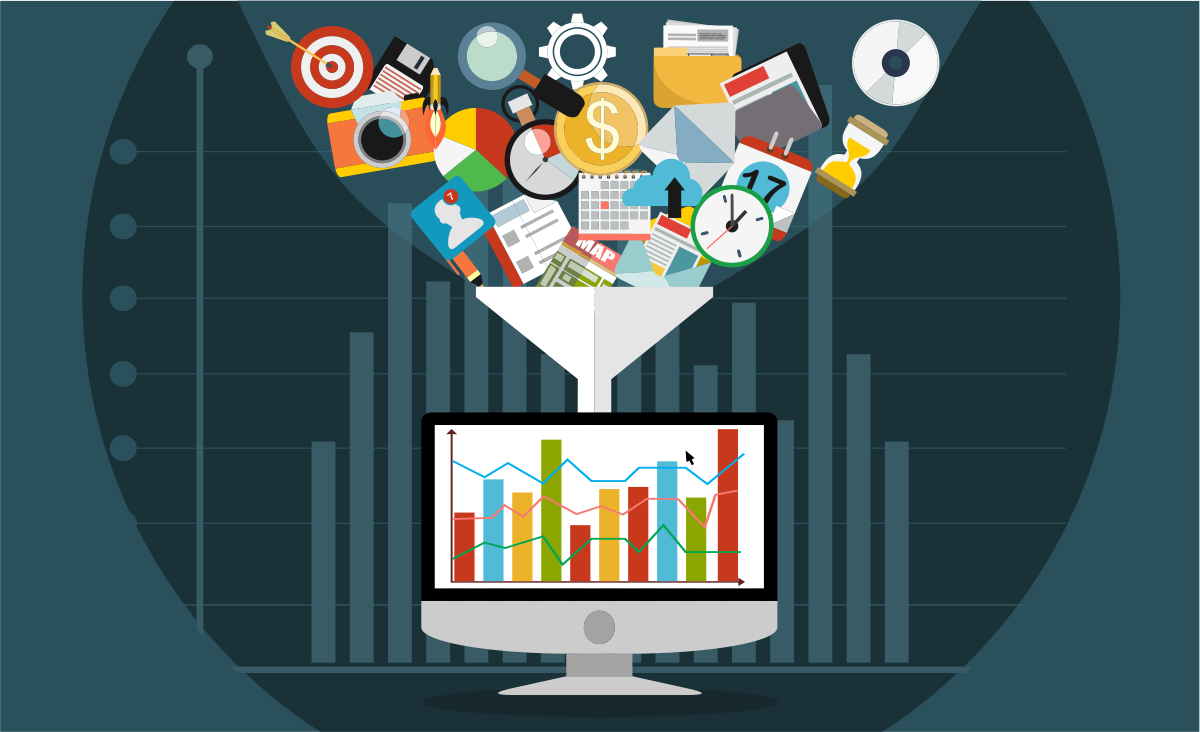

In [171]:
image_magic(6)

## Training Models
Unlike logistic regression, SVMs do this in a non-proabilistic way and are able to fit to non-linear data using an algorithm known as the kernel trick. Furthermore, SVMs can be used for both classification and regression. In sklearn, these are called SVC (Support Vector Classifier) and SVR (Support Vector Regression) respectively. Various models are used to aid us in otaining the desired score.

In [172]:
X = resampled.iloc[:, 1:-1].values
y = resampled.iloc[:, 0].values
print(X)

[[129 19 1 'other']
 [110 18 1 'other']
 [132 19 2 'other']
 ...
 [63 12 1 'other']
 [133 19 2 'other']
 [102 10 2 'other']]


In [173]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
print(X)

[[0.0 1.0 0.0 ... 129 19 1]
 [0.0 1.0 0.0 ... 110 18 1]
 [0.0 1.0 0.0 ... 132 19 2]
 ...
 [0.0 1.0 0.0 ... 63 12 1]
 [0.0 1.0 0.0 ... 133 19 2]
 [0.0 1.0 0.0 ... 102 10 2]]


## Models

## Model One

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [175]:
svc = SVC(kernel='rbf')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

In [176]:
print("The accuracy score of the SVC is:", accuracy_score(y_test, y_pred))
print("\n\nClassification Report:\n\n",classification_report(y_test, y_pred))

The accuracy score of the SVC is: 0.41404938863581875


Classification Report:

               precision    recall  f1-score   support

          -1       0.38      0.12      0.18      1185
           0       0.46      0.19      0.26       684
           1       0.36      0.61      0.45      1183
           2       0.49      0.66      0.56      1119

    accuracy                           0.41      4171
   macro avg       0.42      0.39      0.37      4171
weighted avg       0.42      0.41      0.37      4171



## Model Two

In [177]:
X = np.array(ct.fit_transform(X))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
logreg = LogisticRegression(multi_class = 'ovr')

In [178]:
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
confusion_matrix = confusion_matrix(y_test,y_pred)
confusion_matrix

array([[319, 107, 367, 392],
       [181, 158, 147, 198],
       [268,  54, 393, 468],
       [ 71,   3, 100, 945]], dtype=int64)

In [179]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          -1       0.38      0.27      0.32      1185
           0       0.49      0.23      0.31       684
           1       0.39      0.33      0.36      1183
           2       0.47      0.84      0.61      1119

    accuracy                           0.44      4171
   macro avg       0.43      0.42      0.40      4171
weighted avg       0.43      0.44      0.41      4171



## Model Three

In [180]:
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

print("The accuracy score of the SVC is:", accuracy_score(y_test, y_pred))
print("\n\nClassification Report:\n\n",classification_report(y_test, y_pred))

The accuracy score of the SVC is: 0.4171661472069048


Classification Report:

               precision    recall  f1-score   support

          -1       0.35      0.19      0.25      1185
           0       0.50      0.20      0.28       684
           1       0.40      0.33      0.36      1183
           2       0.43      0.89      0.58      1119

    accuracy                           0.42      4171
   macro avg       0.42      0.40      0.37      4171
weighted avg       0.41      0.42      0.37      4171



#### Final Model

In [181]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
count_vect = CountVectorizer()
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train)

In [182]:
clf = LinearSVC()
clf.fit(X_train_tfidf,y_train)

LinearSVC()

In [183]:
resampled['no_stop_words'] = [','.join(map(str, l)) for l in resampled['no_stop_words']]

In [184]:
X = resampled['no_stop_words']
y = resampled['sentiment']

In [185]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.33,random_state=42)
X[0]

'polyscimajor,epa,chief,doesnt,think,carbon,dioxid,main,caus,global,warm,wait,httpstcoyelvcefxkc,via,mashabl'

In [186]:
X_train_counts = count_vect.fit_transform(X_train)
X_train_counts.shape
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [187]:
X_train_tfidf.shape

(9315, 17785)

In [188]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)

In [189]:
clf = LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)
clf.fit(X_train_tfidf,y_train)

LinearSVC()

In [190]:
text_clf = Pipeline([('tfidf',TfidfVectorizer()),('clf',LinearSVC())])
text_clf.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [191]:
my_predictions = text_clf.predict(test_df['message'])

In [192]:
my_predictions

array([1, 1, 1, ..., 2, 1, 1], dtype=int64)

In [193]:
trial = pd.DataFrame()

In [194]:
trial['tweetid'] = test_df['tweetid']
trial['sentiment'] = my_predictions
trial.reset_index(drop=True,inplace=True)

In [195]:
trial.head()

,tweetid,sentiment
0,169760,1
1,35326,1
2,224985,1
3,476263,1
4,872928,0


In [196]:
trial.to_csv(r"results1.csv",sep=',',index=False)
len(trial)

10546

In [197]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [198]:
predictions = text_clf.predict(X_test)

In [199]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,predictions))

[[1227   29   44   10]
 [ 102  342  203   96]
 [ 106  127  880  202]
 [  27   44  162  987]]


In [200]:
print("The accuracy score of the SVC is:", accuracy_score(y_test, predictions))
print(classification_report(y_test,predictions))

The accuracy score of the SVC is: 0.7489102005231038
              precision    recall  f1-score   support

          -1       0.84      0.94      0.89      1310
           0       0.63      0.46      0.53       743
           1       0.68      0.67      0.68      1315
           2       0.76      0.81      0.78      1220

    accuracy                           0.75      4588
   macro avg       0.73      0.72      0.72      4588
weighted avg       0.74      0.75      0.74      4588



In [202]:
from sklearn import metrics
metrics.accuracy_score(y_test,predictions)

0.7489102005231038

In [203]:
text_clf.predict(['I do not believe climate change is a real thing guys!!! #climatechange #Trump # Ivotedbecause'])

array([1], dtype=int64)

In [204]:
vect = CountVectorizer()
X_count = vect.fit_transform(resampled['no_stop_words'])
X = X_count.toarray()

In [205]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)
logreg = LogisticRegression(multi_class='ovr')

In [206]:
logreg.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\ProgramData\Anaconda3\lib\site-packages

LogisticRegression(multi_class='ovr')

In [207]:
y_pred_test = logreg.predict(X_test)
y_pred_test
print(confusion_matrix(y_test,y_pred_test))

[[744  10  10   6]
 [ 49 245  92  60]
 [ 51  82 554 114]
 [ 20  34  80 630]]


In [208]:
print("The accuracy score of the SVC is:", accuracy_score(y_test, y_pred_test))
print(classification_report(y_test,y_pred_test))

The accuracy score of the SVC is: 0.781373606616325
              precision    recall  f1-score   support

          -1       0.86      0.97      0.91       770
           0       0.66      0.55      0.60       446
           1       0.75      0.69      0.72       801
           2       0.78      0.82      0.80       764

    accuracy                           0.78      2781
   macro avg       0.76      0.76      0.76      2781
weighted avg       0.77      0.78      0.78      2781



In [211]:
test_df["clean_message"] = test_df["message"].apply(remove_punctuation)
test_df["split_tweets"] = [tweets.split() for tweets in test_df["clean_message"]]
test_df['stem'] = test_df["split_tweets"].apply(text_stemmer, args=(stemmer, ))
test_df['lemma'] = test_df['stem'].apply(df_lemma, args=(lemmatizer, ))
test_df["no_stop_words"] = test_df["lemma"].apply(remove_stop_words)
test_df = test_df.drop(["split_tweets","stem","lemma"],axis = 1)
test_df['no_stop_words'] = [','.join(map(str, l)) for l in test_df["no_stop_words"]]
test_df['sentiment'] = sub_df['sentiment']

In [212]:
vect = CountVectorizer()
trial_count = vect.fit_transform(test_df['no_stop_words'])
trial = trial_count.toarray()
y = my_predictions

In [213]:
logreg.fit(trial,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\ProgramData\Anaconda3\lib\site-packages

LogisticRegression(multi_class='ovr')

In [215]:
y_pred_test_sub = logreg.predict(trial)
print("The accuracy score of the SVC is:", accuracy_score(y, y_pred_test_sub))
print(classification_report(y,y_pred_test_sub))

The accuracy score of the SVC is: 0.9585624881471648
              precision    recall  f1-score   support

          -1       1.00      0.79      0.88       566
           0       0.99      0.85      0.92      1089
           1       0.95      1.00      0.97      7030
           2       0.98      0.93      0.96      1861

    accuracy                           0.96     10546
   macro avg       0.98      0.89      0.93     10546
weighted avg       0.96      0.96      0.96     10546



In [220]:
submission = pd.DataFrame({'tweetid':test_df['tweetid'], 'sentiment':y_pred_test_sub})
submission.head()

,tweetid,sentiment
0,169760,1
1,35326,1
2,224985,1
3,476263,1
4,872928,0


In [221]:
filename = 'zm3-edsa-climate-change-belief-analysis-2021.csv'
submission.to_csv(filename, index = False)

In [222]:
experiment.end()

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/thobekanimasondo84-gmail-com/zm3-edsa-climate-change-belief-analysis-2021/4290fb50c6dd4bf995189991835fe2e6
COMET INFO:   Parameters:
COMET INFO:     C                       : 1.0
COMET INFO:     accept_sparse           : True
COMET INFO:     break_ties              : 1
COMET INFO:     cache_size              : 200
COMET INFO:     categories              : auto
COMET INFO:     check_inverse           : 1
COMET INFO:     class_weight            : 1
COMET INFO:     clf                     : LinearSVC()
COMET INFO:     clf_C                   : 1.0
COMET INFO:     clf__C                  : 1.0
COMET INFO:     clf__class_weight       : 1
COMET INFO:     clf__dual               : True
COMET INFO:     clf__fit_intercept      : True
COMET INFO:     clf__i

In [223]:
experiment.display()